In [1]:
import pandas as pd

# Load datasets
savings_df = pd.read_csv('../data/savings_data.csv')
solar_df = pd.read_csv('../data/solar_data.csv')

# Show first 5 rows of each dataset
print("Savings Dataset:")
display(savings_df.head())

print("\nSolar Dataset:")
display(solar_df.head())


Savings Dataset:


,energy_cost,years,tariff,estimated_savings
0,995.090235,4,0.454368,1808.549318
1,300.820277,4,0.330193,397.315377
2,299.332185,15,0.183845,825.462680
3,971.721955,11,0.228542,2442.873629
4,656.737882,15,0.276592,2724.730805



Solar Dataset:


,load,efficiency,hours_per_day,estimated_panels
0,4304.693466,15.463136,6.389649,11.936440
1,850.533009,22.237720,5.558285,1.885243
2,3344.741241,21.256258,6.710043,6.424770
3,4671.175851,21.594768,7.871205,7.529109
4,2295.305946,20.650868,6.336654,4.805620


In [2]:
# %%
# Check basic info and missing values (optional)
print("Savings Data Info:")
savings_df.info()

print("\nSolar Data Info:")
solar_df.info()

print("\nMissing values in Savings data:")
print(savings_df.isnull().sum())

print("\nMissing values in Solar data:")
print(solar_df.isnull().sum())


Savings Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   energy_cost        1000 non-null   float64
 1   years              1000 non-null   int64  
 2   tariff             1000 non-null   float64
 3   estimated_savings  1000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB

Solar Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   load              1000 non-null   float64
 1   efficiency        1000 non-null   float64
 2   hours_per_day     1000 non-null   float64
 3   estimated_panels  1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB

Missing values in Savings data:
energy_cost          0
years                0
tariff      

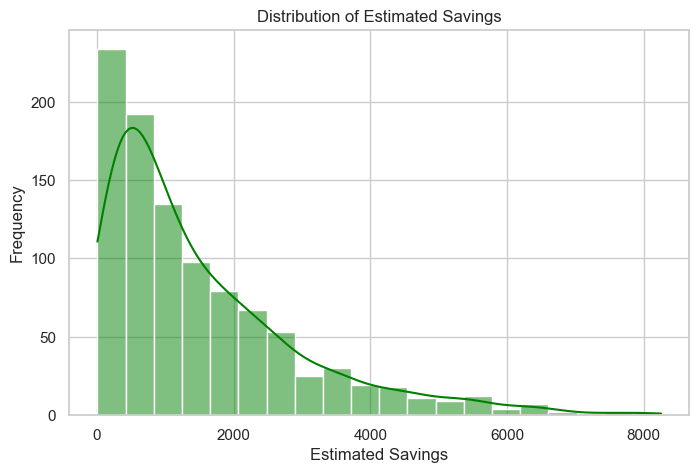

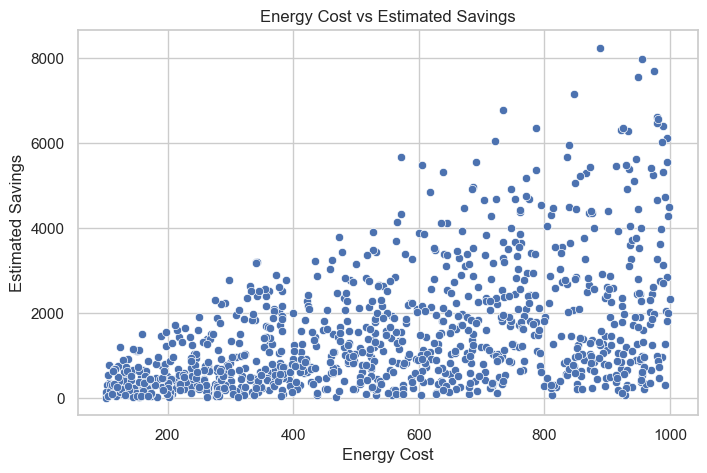

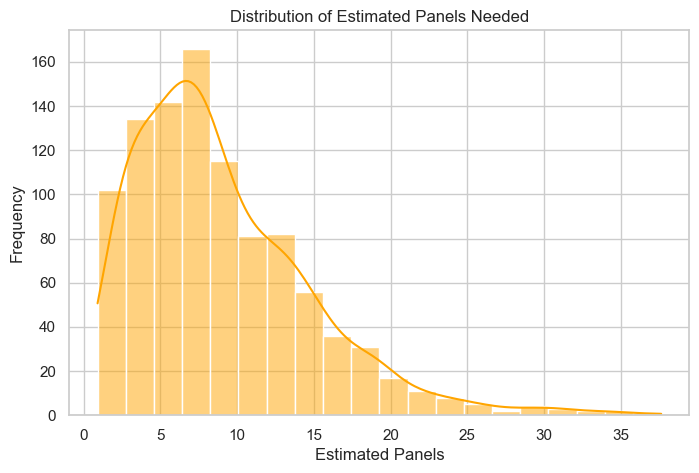

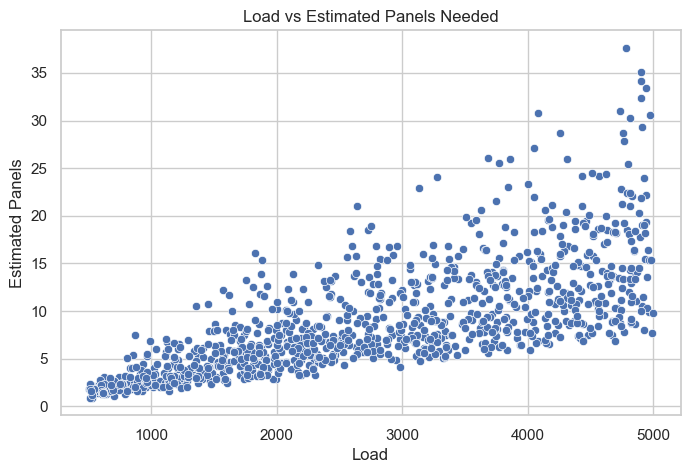

In [3]:
# %%
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Distribution of estimated savings
plt.figure(figsize=(8,5))
sns.histplot(savings_df['estimated_savings'], bins=20, kde=True, color='green')
plt.title('Distribution of Estimated Savings')
plt.xlabel('Estimated Savings')
plt.ylabel('Frequency')
plt.show()

# Scatter plot: Energy Cost vs Estimated Savings
plt.figure(figsize=(8,5))
sns.scatterplot(x='energy_cost', y='estimated_savings', data=savings_df)
plt.title('Energy Cost vs Estimated Savings')
plt.xlabel('Energy Cost')
plt.ylabel('Estimated Savings')
plt.show()

# Distribution of Estimated Panels (Solar Data)
plt.figure(figsize=(8,5))
sns.histplot(solar_df['estimated_panels'], bins=20, kde=True, color='orange')
plt.title('Distribution of Estimated Panels Needed')
plt.xlabel('Estimated Panels')
plt.ylabel('Frequency')
plt.show()

# Scatter plot: Load vs Estimated Panels
plt.figure(figsize=(8,5))
sns.scatterplot(x='load', y='estimated_panels', data=solar_df)
plt.title('Load vs Estimated Panels Needed')
plt.xlabel('Load')
plt.ylabel('Estimated Panels')
plt.show()


In [4]:
# %%
from sklearn.model_selection import train_test_split

# Prepare Savings Estimator data
X_savings = savings_df[['energy_cost', 'years', 'tariff']]
y_savings = savings_df['estimated_savings']

X_train_sav, X_test_sav, y_train_sav, y_test_sav = train_test_split(
    X_savings, y_savings, test_size=0.2, random_state=42)

print("Savings Estimator data split done!")
print(f"Train samples: {X_train_sav.shape[0]}, Test samples: {X_test_sav.shape[0]}")


Savings Estimator data split done!
Train samples: 800, Test samples: 200


In [5]:
# %%
# Prepare Solar Calculator data
X_solar = solar_df[['load', 'efficiency', 'hours_per_day']]
y_solar = solar_df['estimated_panels']

X_train_sol, X_test_sol, y_train_sol, y_test_sol = train_test_split(
    X_solar, y_solar, test_size=0.2, random_state=42)

print("Solar Calculator data split done!")
print(f"Train samples: {X_train_sol.shape[0]}, Test samples: {X_test_sol.shape[0]}")


Solar Calculator data split done!
Train samples: 800, Test samples: 200


In [6]:
# %%
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train Savings Estimator model
lr_savings = LinearRegression()
lr_savings.fit(X_train_sav, y_train_sav)
y_pred_sav = lr_savings.predict(X_test_sav)

mse_sav = mean_squared_error(y_test_sav, y_pred_sav)
r2_sav = r2_score(y_test_sav, y_pred_sav)
print(f"Savings Estimator Model - MSE: {mse_sav:.2f}, R2: {r2_sav:.2f}")


Savings Estimator Model - MSE: 522601.49, R2: 0.76


In [7]:
# %%
# Train Solar Calculator model
lr_solar = LinearRegression()
lr_solar.fit(X_train_sol, y_train_sol)
y_pred_sol = lr_solar.predict(X_test_sol)

mse_sol = mean_squared_error(y_test_sol, y_pred_sol)
r2_sol = r2_score(y_test_sol, y_pred_sol)
print(f"Solar Calculator Model - MSE: {mse_sol:.2f}, R2: {r2_sol:.2f}")


Solar Calculator Model - MSE: 4.32, R2: 0.87


In [8]:
# %%
import joblib
import os

# Make sure 'models' folder exists
os.makedirs('models', exist_ok=True)

# Save models in 'models/' folder
joblib.dump(lr_savings, 'models/savings_estimator_model.pkl')
print("Savings Estimator model saved in models/ folder!")

joblib.dump(lr_solar, 'models/solar_calculator_model.pkl')
print("Solar Calculator model saved in models/ folder!")


Savings Estimator model saved in models/ folder!
Solar Calculator model saved in models/ folder!


In [9]:
# %%
# Load models separately from models folder
savings_model = joblib.load('models/savings_estimator_model.pkl')
solar_model = joblib.load('models/solar_calculator_model.pkl')

print("Both models loaded successfully.")


Both models loaded successfully.


In [10]:
# %%
# Example prediction for Savings Estimator
input_data_savings = [[1200, 5, 0.3]]
predicted_savings = savings_model.predict(input_data_savings)
print(f"Predicted Estimated Savings: ${predicted_savings[0]:.2f}")


Predicted Estimated Savings: $2692.68


c:\Users\yazhi\Downloads\YAZH\YAZH\SolarWiseML\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [11]:
# %%
# Example prediction for Solar Calculator
input_data_solar = [[5000, 15, 6]]  # Example: load=5000 kWh, efficiency=15%, hours/day=6
predicted_panels = solar_model.predict(input_data_solar)
print(f"Estimated Number of Solar Panels Needed: {predicted_panels[0]:.2f}")


Estimated Number of Solar Panels Needed: 16.95


c:\Users\yazhi\Downloads\YAZH\YAZH\SolarWiseML\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
